EEE598 HW3 Problem 8a

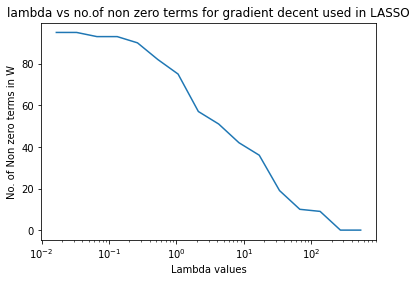

In [1]:
#Problem 8a

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df_train = pd.read_table("/content/crime-train.txt")
df_test = pd.read_table("/content/crime-test.txt")

############# Perform gradient decent to solve LASSO#################
x_train = df_train.iloc[:,1:96]
y_train = df_train.iloc[:,0]

x_test = df_test.iloc[:,1:96]
y_test = df_test.iloc[:,0]

x_t = x_train.to_numpy()
y_t = y_train.to_numpy()

lambda_max = np.max(2*np.absolute(np.dot(np.transpose(x_train),y_train-np.mean(y_train))))

d = len(x_train.columns)
n = len(x_train.index)

a = np.sum(x_train*x_train,0)
a = 2*a

#Initialize list to keep track of values of lambda and no. of non zero values
lamd = []
cout = []

# For the maximum value of lambda, the w matrix will be zero
w_k = np.zeros((d,))


#Loop for iterating through each value of lambda
while lambda_max > 0.01:

  #Find the number of non zeros in the  w matrix
    count = 0

    #check for convergence
    for r in range(len(w_k)):
      if w_k[r] != 0:
        count = count + 1
    #Update lambda value and the count of non zero values
    lamd.append(lambda_max)
    cout.append(count)

    #Assign a value for the difference
 #Assign a value for the difference
    diff = 1
    converge = 0
   
    c_k = np.zeros((d,))
    #loop for checking if the values of w have converged or not
    while converge != d:
     
      #Find b
      
      #b = (np.sum(y_train.values - np.dot(x_train.values,w_k))) / n
      b = 1/n * (np.sum(y_t - np.dot(x_t,w_k)))


      #Store the old value of w so that we can check later
      w_old = w_k

      # Loop from 0 to d
      for k in range(d):
        #x0 = np.delete(x_train.values,k,1)
        # x0 = np.delete(x_t,k,1)
        # w0 = np.delete(w_k,k,0)

        #Find c values
        #c_k = 2*np.sum(np.dot(np.transpose(x_train.iloc[:,k].values),(y_train.values - (b + np.sum(np.dot(x0,w0).reshape(n,1))))))
        c_k[k] = 2*np.dot(x_t[:,k],y_t - (b + np.dot(w_k.T,x_t.T) - w_k[k] * x_t[:,k]))
        
        # Check for the condition to input the value of w
        if c_k[k] < -lambda_max:
          w_k[k] = (c_k[k]+lambda_max) / a[k]
        elif c_k[k] >= -lambda_max and c_k[k] <= lambda_max:
          w_k[k] = 0
        elif c_k[k] > lambda_max:
          w_k[k] = (c_k[k]-lambda_max) / a[k]

      #Find the difference between the current and the previous weights  
      converge = 0
      for i in range(len(w_k)):
        if np.absolute(w_old[i] - w_k[i]) <= 0.01:
          converge = converge + 1
    #Decrease lambda once values of weights converge
    
    lambda_max = lambda_max / 2

############# Done with computing the converged w for each lambda ##############
# for i in range(len(lamd)):
#   lamd[i] = 1/lamd[i]


############# Plot the graph ############################
plt.plot(lamd,cout)
plt.xlabel("Lambda values")
plt.ylabel("No. of Non zero terms in W")
plt.xscale('log')
plt.title("lambda vs no.of non zero terms for gradient decent used in LASSO")
plt.show()
############# Done with plotting #######################


EEE598 HW3 Problem 8b

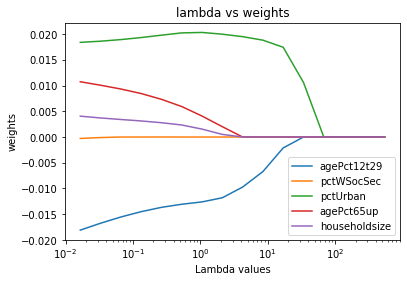

In [2]:
# Problem 8b

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df_train = pd.read_table("/content/crime-train.txt")
df_test = pd.read_table("/content/crime-test.txt")

############# Perform gradient decent to solve LASSO#################
x_train = df_train.iloc[:,1:96]
y_train = df_train.iloc[:,0]

x_test = df_test.iloc[:,1:96]
y_test = df_test.iloc[:,0]

x_t = x_train.to_numpy()
y_t = y_train.to_numpy()

lambda_max = np.max(2*np.absolute(np.dot(np.transpose(x_t),y_t-np.mean(y_t))))


d = len(x_train.columns)
n = len(x_train.index)

a = 2 * np.sum(np.square(x_train),0)

#Initialize list to keep track of values of lambda and no. of non zero values
lamd = []

# For the maximum value of lambda, the w matrix will be zero
w_k = np.zeros((d,))

age_pct = []
pctW = []
pct = []
agepct = []
hhs = []
f=0

#Loop for iterating through each value of lambda
while lambda_max > 0.01:
    
    #Update lambda value and the count of non zero values
    lamd.append(lambda_max)
    age_pct.append(float(w_k[x_train.columns.get_loc('agePct12t29')]))
    pctW.append(float(w_k[x_train.columns.get_loc('pctWSocSec')]))
    pct.append(float(w_k[x_train.columns.get_loc('pctUrban')]))
    agepct.append(float(w_k[x_train.columns.get_loc('agePct65up')]))
    hhs.append(float(w_k[x_train.columns.get_loc('householdsize')]))
    # print(x_train.columns.get_loc('agePct12t29'))
    # print(x_train.columns.get_loc('pctWSocSec'))
    # print(x_train.columns.get_loc('pctUrban'))
    # print(x_train.columns.get_loc('agePct65up'))
    # print(x_train.columns.get_loc('householdsize'))
    
    
    #Assign a value for the difference
    diff = 1
    converge = 0
   
    c_k = np.zeros((d,))
    #loop for checking if the values of w have converged or not
    while converge != d:
     
      #Find b
      
      #b = (np.sum(y_train.values - np.dot(x_train.values,w_k))) / n
      b = 1/n * (np.sum(y_t - np.dot(x_t,w_k)))


      #Store the old value of w so that we can check later
      w_old = w_k

      # Loop from 0 to d
      for k in range(d):
        #x0 = np.delete(x_train.values,k,1)
        # x0 = np.delete(x_t,k,1)
        # w0 = np.delete(w_k,k,0)

        #Find c values
        #c_k = 2*np.sum(np.dot(np.transpose(x_train.iloc[:,k].values),(y_train.values - (b + np.sum(np.dot(x0,w0).reshape(n,1))))))
        c_k[k] = 2*np.dot(x_t[:,k], y_t - (b + np.dot(w_k.T,x_t.T) - w_k[k] * x_t[:,k]))
        
        # Check for the condition to input the value of w
        if c_k[k] < -lambda_max:
          w_k[k] = (c_k[k]+lambda_max) / a[k]
        elif c_k[k] >= -lambda_max and c_k[k] <= lambda_max:
          w_k[k] = 0
        elif c_k[k] > lambda_max:
          w_k[k] = (c_k[k]-lambda_max) / a[k]

      #Find the difference between the current and the previous weights  
      converge = 0
      for i in range(len(w_k)):
        if np.absolute(w_old[i] - w_k[i]) <= 0.01:
          converge = converge + 1
    #Decrease lambda once values of weights converge
    
    lambda_max = lambda_max / 2

############# Done with computing the converged w for each lambda ##############
# for i in range(len(lamd)):
#   lamd[i] = 1/lamd[i]

############# Plot the graph ############################

plt.plot(lamd,age_pct, label = "agePct12t29")
plt.plot(lamd,pctW, label = "pctWSocSec")
plt.plot(lamd,pct, label = "pctUrban")
plt.plot(lamd,agepct,label = "agePct65up")
plt.plot(lamd,hhs, label = "householdsize")
plt.xscale('log')
plt.xlabel("Lambda values")
plt.legend()
plt.title("lambda vs weights")
plt.ylabel("weights")
plt.show()
############# Done with plotting #######################

EEE598 HW3 Problem 8c

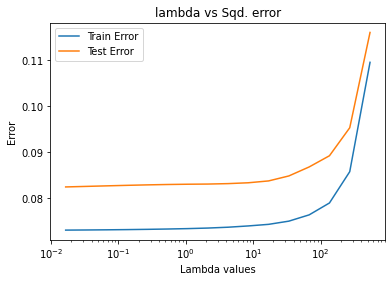

In [3]:
# Problem 8c

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df_train = pd.read_table("/content/crime-train.txt")
df_test = pd.read_table("/content/crime-test.txt")

############# Perform gradient decent to solve LASSO#################
x_train = df_train.iloc[:,1:96]
y_train = df_train.iloc[:,0]

x_test = df_test.iloc[:,1:96]
y_test = df_test.iloc[:,0]

x_t = x_train.to_numpy()
y_t = y_train.to_numpy()

x_te = x_test.to_numpy()
y_te = y_test.to_numpy()

lambda_max = np.max(2*np.absolute(np.dot(np.transpose(x_t),y_t-np.mean(y_t))))

d = len(x_train.columns)
n1 = len(x_train.index)
n2 = len(x_test.index)
a = 2 * np.sum(np.square(x_train),0)

#Initialize list to keep track of values of lambda and no. of non zero values
lamd = []

# For the maximum value of lambda, the w matrix will be zero
w_k = np.zeros((d,))

#Initialize list to keep track of values of lambda and no. of non zero values

train_error = []
test_error = []



def error(y,x,w,n):
  return np.sum(pow((y - np.dot(x,w)),2)) / n

#Loop for iterating through each value of lambda
while lambda_max > 0.01:
  #Find the number of non zeros in the  w matrix

    #Update lambda value and the count of non zero values

    #Assign a value for the difference
    #Assign a value for the difference

    converge = 0

    c_k = np.zeros((d,))
    #loop for checking if the values of w have converged or not
    while converge != d:
     
      #Find b
      b = 1/n1 * (np.sum(y_t - np.dot(x_t,w_k)))

      #Store the old value of w so that we can check later
      w_old = w_k

      # Loop from 0 to d
      for k in range(d):
        #x0 = np.delete(x_train.values,k,1)
        # x0 = np.delete(x_t,k,1)
        # w0 = np.delete(w_k,k,0)

        #Find c values
        #c_k = 2*np.sum(np.dot(np.transpose(x_train.iloc[:,k].values),(y_train.values - (b + np.sum(np.dot(x0,w0).reshape(n,1))))))
        c_k[k] = 2*np.dot(x_t[:,k], y_t - (b + np.dot(w_k.T,x_t.T) - w_k[k] * x_t[:,k]))
        
        # Check for the condition to input the value of w
        if c_k[k] < -lambda_max:
          w_k[k] = (c_k[k]+lambda_max) / a[k]
        elif c_k[k] >= -lambda_max and c_k[k] <= lambda_max:
          w_k[k] = 0
        elif c_k[k] > lambda_max:
          w_k[k] = (c_k[k]-lambda_max) / a[k]

      #Find the difference between the current and the previous weights  
      converge = 0
      for i in range(len(w_k)):
        if np.absolute(w_old[i] - w_k[i]) <= 0.01:
          converge = converge + 1
    #Decrease lambda once values of weights converge
    lamd.append(lambda_max)
    train_error.append(error(y_t,x_t,w_k,n1))
    test_error.append(error(y_te,x_te,w_k,n2))
    
    lambda_max = lambda_max / 2

############# Done with computing the converged w for each lambda ##############
#for i in range(len(lamd)):
 # lamd[i] = 1/lamd[i]

############# Plot the graph ############################
plt.plot(lamd,train_error, label = "Train Error")
plt.plot(lamd,test_error, label = "Test Error")
plt.xlabel("Lambda values")
plt.ylabel("Error")
plt.xscale('log')
plt.title("lambda vs Sqd. error")
plt.legend()
plt.show()
############# Done with plotting #######################

EEE598 HW3 Problem 8d

In [4]:
# Problem 8d

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df_train = pd.read_table("/content/crime-train.txt")
df_test = pd.read_table("/content/crime-test.txt")

############# Perform gradient decent to solve LASSO#################
x_train = df_train.iloc[:,1:96]
y_train = df_train.iloc[:,0]

x_test = df_test.iloc[:,1:96]
y_test = df_test.iloc[:,0]


lambda_max = np.max(2*np.absolute(np.dot(np.transpose(x_train),y_train-np.mean(y_train))))

d = len(x_train.columns)
n = len(x_train.index)

a = np.sum(x_train*x_train,0)
a = 2*a

#Initialize list to keep track of values of lambda and no. of non zero values
lamd = []

# For the maximum value of lambda, the w matrix will be zero
w_k = np.zeros((d,))

lambda_max = 30

diff = 1
converge = 0

c_k = np.zeros((d,))
#loop for checking if the values of w have converged or not
while converge != d:
  
  #Find b
  
  #b = (np.sum(y_train.values - np.dot(x_train.values,w_k))) / n
  b = 1/n * (np.sum(y_t - np.dot(x_t,w_k)))

  #Store the old value of w so that we can check later
  w_old = w_k

  # Loop from 0 to d
  for k in range(d):
    #x0 = np.delete(x_train.values,k,1)
    # x0 = np.delete(x_t,k,1)
    # w0 = np.delete(w_k,k,0)

    #Find c values
    #c_k = 2*np.sum(np.dot(np.transpose(x_train.iloc[:,k].values),(y_train.values - (b + np.sum(np.dot(x0,w0).reshape(n,1))))))
    c_k[k] = 2*np.dot(x_t[:,k],y_t - (b + np.dot(w_k.T,x_t.T) - w_k[k] * x_t[:,k]))
    
    # Check for the condition to input the value of w
    if c_k[k] < -lambda_max:
      w_k[k] = (c_k[k]+lambda_max) / a[k]
    elif c_k[k] >= -lambda_max and c_k[k] <= lambda_max:
      w_k[k] = 0
    elif c_k[k] > lambda_max:
      w_k[k] = (c_k[k]-lambda_max) / a[k]

  #Find the difference between the current and the previous weights  
  converge = 0
  for i in range(len(w_k)):
    if np.absolute(w_old[i] - w_k[i]) <= 0.01:
      converge = converge + 1

max = w_k.argmax()
min = w_k.argmin()
lst = x_train.columns.values.tolist()

print("The feature with highest weight for lambda=30 is:", lst[max])

print("\nThe feature with lowest weight for lambda=30 is:", lst[min])



The feature with highest weight for lambda=30 is: population

The feature with lowest weight for lambda=30 is: medIncome
